In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from tensorflow import keras


In [25]:
from tensorflow.keras import datasets

In [26]:
from tensorflow.keras.datasets import fashion_mnist

In [27]:
from tensorflow.keras.layers import Dropout,Dense,Flatten

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

In [30]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 2

In [31]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


In [32]:
print(y_train.shape)



(60000,)


In [33]:
idx = np.argmax(y_train[10])
idx

0

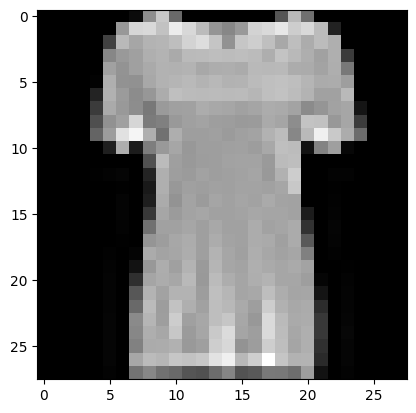

In [34]:
plt.imshow(X_train[10],cmap='gray')
plt.show()

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_test.shape

(10000, 28, 28)

In [37]:
#normalize
X_train=X_train/255
X_test=X_test/255

In [38]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [39]:
from tensorflow.keras import regularizers

In [40]:
activation = keras.activations.relu

In [41]:
# model architecture
model = keras.models.Sequential()
model.add(keras.layers.Flatten(name='flatten'))
model.add(keras.layers.Dense(units=256,activation=None,kernel_regularizer=regularizers.l2(0.0001),name="hidden1"))
model.add(keras.layers.BatchNormalization(name="batch1"))
model.add(keras.layers.Activation(activation,name="activation1"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256,activation=None,kernel_regularizer=regularizers.l2(0.0001),name="hidden2"))
model.add(keras.layers.BatchNormalization(name="batch2"))
model.add(keras.layers.Activation(activation,name="activation2"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256,activation=None,kernel_regularizer=regularizers.l2(0.0001),name="hidden3"))
model.add(keras.layers.BatchNormalization(name="batch3"))
model.add(keras.layers.Activation(activation,name="activation3"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256,activation=None,kernel_regularizer=regularizers.l2(0.0001),name="hidden4"))
model.add(keras.layers.BatchNormalization(name="batch4"))
model.add(keras.layers.Activation(activation,name="activation4"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [42]:
model.build(input_shape=(None,784))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch1 (BatchNormalization)  (None, 256)              1024      
                                                                 
 activation1 (Activation)    (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 hidden2 (Dense)             (None, 256)               65792     
                                                                 
 batch2 (BatchNormalization)  (None, 256)             

In [44]:
opt=tf.optimizers.Adam(learning_rate=0.001)
loss=tf.losses.CategoricalCrossentropy()
metric=tf.metrics.CategoricalAccuracy()
model.compile(optimizer=opt,loss=loss,metrics=metric)

In [45]:
model.fit(X_train,y_train,epochs=50,batch_size=100,validation_split=0.2,verbose=2)

Epoch 1/50
480/480 - 5s - loss: 1.0522 - categorical_accuracy: 0.6720 - val_loss: 0.5855 - val_categorical_accuracy: 0.8309 - 5s/epoch - 10ms/step
Epoch 2/50
480/480 - 3s - loss: 0.6942 - categorical_accuracy: 0.7997 - val_loss: 0.5561 - val_categorical_accuracy: 0.8438 - 3s/epoch - 6ms/step
Epoch 3/50
480/480 - 3s - loss: 0.6276 - categorical_accuracy: 0.8225 - val_loss: 0.5453 - val_categorical_accuracy: 0.8436 - 3s/epoch - 6ms/step
Epoch 4/50
480/480 - 3s - loss: 0.5892 - categorical_accuracy: 0.8340 - val_loss: 0.4903 - val_categorical_accuracy: 0.8663 - 3s/epoch - 6ms/step
Epoch 5/50
480/480 - 3s - loss: 0.5712 - categorical_accuracy: 0.8417 - val_loss: 0.4866 - val_categorical_accuracy: 0.8622 - 3s/epoch - 6ms/step
Epoch 6/50
480/480 - 3s - loss: 0.5569 - categorical_accuracy: 0.8448 - val_loss: 0.4879 - val_categorical_accuracy: 0.8631 - 3s/epoch - 6ms/step
Epoch 7/50
480/480 - 3s - loss: 0.5391 - categorical_accuracy: 0.8498 - val_loss: 0.4940 - val_categorical_accuracy: 0.8585

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4769 - categorical_accuracy: 0.8690


[0.4769062101840973, 0.8690000176429749]

In [47]:
from PIL import Image,ImageOps

In [48]:
img=Image.open(r"C:\Users\reyha\Desktop\data science class\neural network\image.jpg")

In [49]:
img.thumbnail((28,28))

In [50]:
grayscale_img=img.convert("L")

In [51]:
grayscale_img

In [52]:
grayscale_img = ImageOps.invert(grayscale_img)

In [53]:
grayscale_img = np.array(grayscale_img).reshape((1,28,28)) / 255

In [54]:
grayscale_img.min()

0.0

In [55]:
grayscale_img.max()

0.8117647058823529

In [56]:
pred_img = model.predict(grayscale_img)

1/1 [==============================] - 0s 118ms/step


In [57]:
pred_img

array([[9.63345587e-01, 3.82145699e-05, 1.77236201e-04, 2.75814324e-03,
        2.20817947e-06, 1.58300129e-08, 3.36676054e-02, 4.06115697e-10,
        1.09676985e-05, 3.39132322e-09]], dtype=float32)

In [58]:
pred_img.argmax()

0

In [59]:
pred_img[0][0]*100

96.33455872535706